----
# **SUPERVISED LEARNING WITH SCIKIT LEARN**
-----

----
## **CLASSIFICATION** (1)
-----

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.datasets import load_boston

In [3]:
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
type(iris.data) , type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris.data
y = iris.target

## **EDA**
-----

In [9]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [177]:
vote = pd.read_csv("house-votes-84.data.txt")

In [178]:
df = pd.read_csv('house-votes-84.data.txt', header=None)
df.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.replace({'?':'n'}, inplace=True)
df.replace({'n':0, 'y': 1}, inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


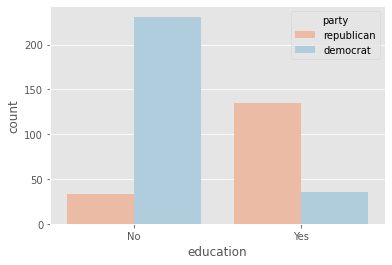

In [12]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

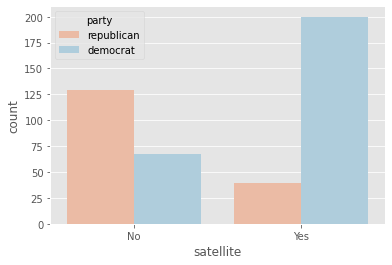

In [13]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

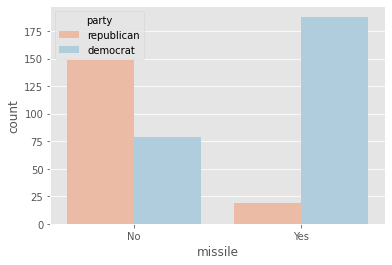

In [14]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# **THE CLASSIFICATION CHALLENGE**
----

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [17]:
x_new = np.array([[5.6,2.8,3.9,11],
                 [5.7,2.6,3.8,1.3],
                 [4.7,3.2,1.3,0.2]])

In [18]:
predict= knn.predict(x_new)

In [19]:
print("Prediccion: {}" .format(predict))

Prediccion: [2 1 0]


In [20]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [21]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [22]:
# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

¡Excelente! Ahora que su clasificador k-NN con 6 vecinos se ha ajustado a los datos, se puede usar para predecir las etiquetas de nuevos puntos de datos.

# **k-Nearest Neighbors: Predict**
----

In [23]:
X_new = pd.DataFrame([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 
                      0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678,
                      0.398044, 0.737995]).transpose()

In [24]:
# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


# **Measuring model performance**
----

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.3,random_state=42)

In [27]:
knn= KNeighborsClassifier(n_neighbors=8)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [29]:
predi = knn.predict(X_test)

In [30]:
print("Test set prediction: {}" .format(predi))

Test set prediction: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [31]:
knn.score(X_test,y_test)

1.0

# **The digits recognition dataset**
-----

In [32]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [33]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [34]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [35]:
# Print the shape of the images and data keys
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


Muestre la imagen 1011 usando plt.imshow (). Esto se ha hecho para usted, así que presione 'Enviar respuesta' para ver qué dígito escrito a mano es este.

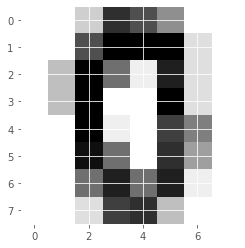

In [36]:
# Display digit 1010
plt.imshow(digits.images[20], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [37]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [38]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [39]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42, stratify=y)

In [40]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [41]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [42]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


¡Excelente trabajo! Increíblemente, este clasificador k-NN listo para usar con 7 vecinos aprendió de los datos de entrenamiento y predijo las etiquetas de las imágenes en el conjunto de prueba con una precisión del 98%, ¡y lo hizo en menos de un segundo! Esta es una ilustración de lo increíblemente útiles que pueden ser las técnicas de aprendizaje automático.

**Overfitting and underfitting**

¿Recuerda la curva de complejidad del modelo que mostró Hugo en el video? ¡Ahora construirá dicha curva para el conjunto de datos de dígitos! En este ejercicio, calculará y trazará los puntajes de precisión de entrenamiento y prueba para una variedad de valores vecinos diferentes. Al observar cómo difieren los puntajes de precisión para los conjuntos de entrenamiento y prueba con diferentes valores de k, desarrollará su intuición para sobreajustar y desajustar.


In [43]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [44]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

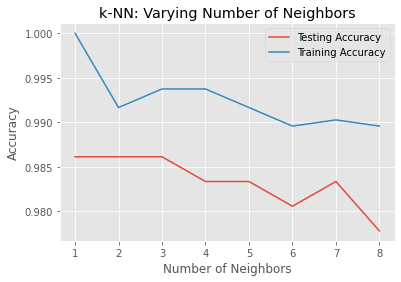

In [45]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Buen trabajo! Parece que la precisión de la prueba es máxima cuando se utilizan 3 y 5 vecinos. El uso de 8 vecinos o más parece resultar en un modelo simple que no se ajusta a los datos. Ahora que ha comprendido los fundamentos de la clasificación, ¡aprenderá sobre la regresión en el próximo capítulo!

------
## **INTRODUCTION TO REGRESSION** (2)
------

In [46]:
from sklearn.datasets import load_boston

In [47]:
boston = load_boston()

In [48]:
house = pd.DataFrame(data=boston.data, columns=boston.feature_names)
house['MEDV'] = boston['target']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
# Creature feature and target arrays
X = house.drop('MEDV', axis=1).values
y = house['MEDV'].values

In [50]:
# Predicting house price from a single feature
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [51]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)

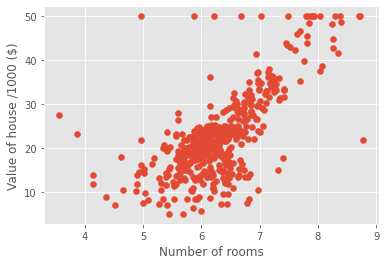

In [52]:
# Plotting house value vs number of rooms 
plt.scatter(X_rooms,y)
plt.xlabel("Number of rooms")
plt.ylabel("Value of house /1000 ($)")
plt.show()

In [53]:
# fifting a Regression Model
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(X_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
predict_space = np.linspace(np.min(X_rooms), np.max(X_rooms)).reshape(-1,1)

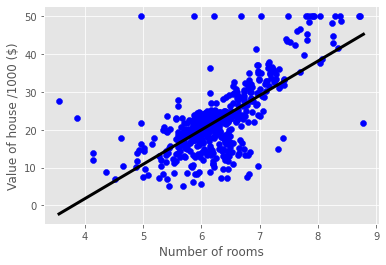

In [57]:
#Plot predicction 
plt.scatter(X_rooms,y, color='blue')
plt.plot(predict_space, reg.predict(predict_space), color= 'black', linewidth=3)
plt.xlabel("Number of rooms")
plt.ylabel("Value of house /1000 ($)")
plt.show()

# Which of the following is a regression problem?
Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

Una empresa de comercio electrónico que utiliza datos de clientes etiquetados para predecir si un cliente comprará o no un artículo en particular.

Una empresa de atención médica que utiliza datos sobre tumores cancerosos (como sus medidas geométricas) para predecir si un nuevo tumor es benigno o maligno.

Un restaurante que utiliza datos de reseñas para atribuir un sentimiento positivo o negativo a una reseña determinada.

Una empresa de bicicletas compartidas que utiliza datos de tiempo y clima para predecir la cantidad de bicicletas que se alquilan en una hora determinada.



In [ ]:
#pd.read_csv("/content/sample_data/california_housing_train.csv")

# Importing data for supervised learning

En este capítulo, trabajará con datos de Gapminder que hemos consolidado en un archivo CSV disponible en el espacio de trabajo como 'gapminder.csv'. Específicamente, su objetivo será utilizar estos datos para predecir la esperanza de vida en un país determinado en función de características como el PIB, la tasa de fertilidad y la población del país. Como en el Capítulo 1, el conjunto de datos ha sido preprocesado.

Dado que la variable objetivo aquí es cuantitativa, este es un problema de regresión. Para empezar, ajustará una regresión lineal con una sola característica: 'fertilidad', que es el número promedio de hijos que da a luz una mujer en un país determinado. En ejercicios posteriores, utilizará todas las funciones para crear modelos de regresión.


In [157]:
df_p = pd.read_csv('/content/gm_2008_region.txt',sep='\t')
df_p.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [59]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

In [60]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [61]:
# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)



¡Buen trabajo! Observe las diferencias de forma antes y después de aplicar el método .reshape (). Obtener las matrices de características y variables de destino en el formato correcto para scikit-learn es un precursor importante para la construcción de modelos.

# Exploring the Gapminder data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [63]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


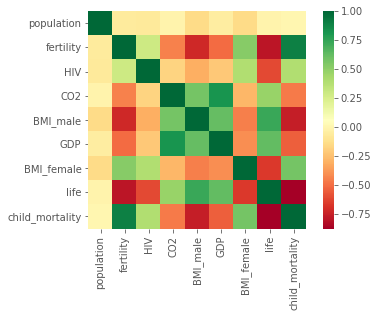

In [64]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')



# Fit & predict for regression

Ahora, ajustará una regresión lineal y predecirá la esperanza de vida utilizando solo una función. Viste a Andy hacer esto antes usando la función 'RM' del conjunto de datos de viviendas de Boston. En este ejercicio, utilizará la función de 'fertilidad' del conjunto de datos de Gapminder. Dado que el objetivo es predecir la esperanza de vida, la variable objetivo aquí es "vida". La matriz para la variable de destino se cargó previamente como y y la matriz para 'fertilidad' se cargó previamente como X_fertility.

In [65]:
# Create the regressor: reg
reg = LinearRegression()

In [66]:
X_fertility = X

In [67]:
# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [68]:
# Fit the model to the data
reg.fit(X_fertility, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

In [70]:
# Print R^2 
print(reg.score(X_fertility, y))


0.6192442167740035


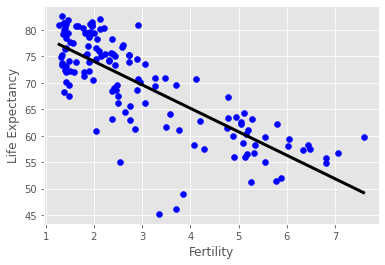

In [71]:
# Plot regression line
plt.scatter(X_fertility,y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.show()

¡Fantástico! Observe cómo la línea captura la tendencia subyacente en los datos. ¡Y el rendimiento es bastante decente para este modelo de regresión básico con una sola característica!

**Train/test split for regression**

Como aprendió en el Capítulo 1, los conjuntos de entrenamiento y prueba son vitales para garantizar que su modelo de aprendizaje supervisado pueda generalizar bien a nuevos datos. Esto fue cierto para los modelos de clasificación e igualmente cierto para los modelos de regresión lineal.

En este ejercicio, dividirá el conjunto de datos de Gapminder en conjuntos de entrenamiento y prueba, y luego ajustará y predecirá una regresión lineal sobre todas las características. Además de calcular la puntuación R2, también calculará el error cuadrático medio de la raíz (RMSE), que es otra métrica de uso común para evaluar modelos de regresión. La matriz de características X y la matriz de variables de destino y se han precargado desde el DataFrame df



In [72]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [73]:
X = df.drop(['life', 'Region'], axis=1)
y = df['life']

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [74]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [75]:
# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

In [76]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.5574273820963696
Root Mean Squared Error: 1.9056601333729999


¡Excelente! El uso de todas las funciones ha mejorado la puntuación del modelo. Esto tiene sentido, ya que el modelo tiene más información de la que aprender. Sin embargo, existe un peligro potencial en este proceso. ¿Puedes distinguirlo? ¡También aprenderá sobre esto y cómo validar mejor sus modelos en el siguiente video!

# Cross-validation
---------

**La longitud de la matriz es el numero de folds utilizados**

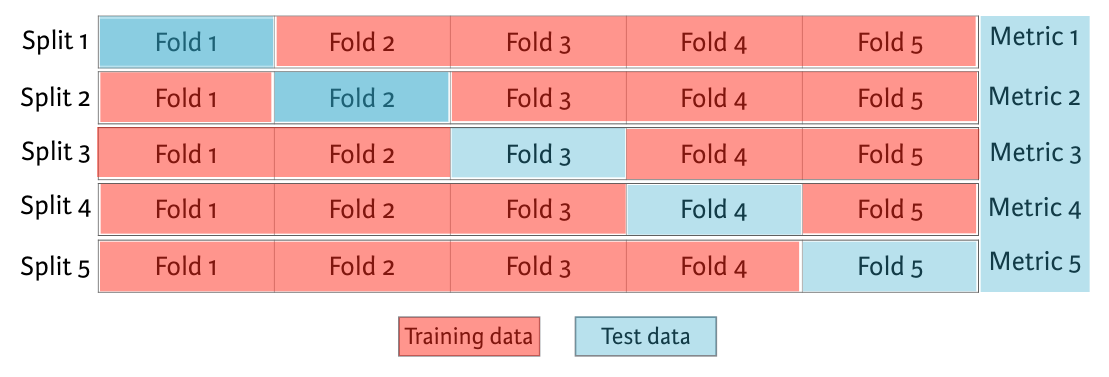

# 5-fold cross-validation
-----
La validación cruzada es un paso vital en la evaluación de un modelo. Maximiza la cantidad de datos que se utilizan para entrenar el modelo, ya que durante el curso del entrenamiento, el modelo no solo se entrena, sino que también se prueba con todos los datos disponibles.

En este ejercicio, practicará la validación cruzada de 5 veces en los datos de Gapminder. De forma predeterminada, la función cross_val_score () de scikit-learn usa R2 como la métrica de elección para la regresión. Dado que está realizando una validación cruzada de 5 veces, la función devolverá 5 puntuaciones. Su trabajo es calcular estos 5 puntajes y luego tomar su promedio.

El DataFrame se ha cargado como df y se ha dividido en las matrices X e y de características / variables de destino. Los módulos pandas y numpy se han importado como pd y np, respectivamente.

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
# Create a   regression object: reg
model = LinearRegression()

In [79]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(model,X,y, cv=5)

In [80]:
# Print the 5-fold cross-validation scores
print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [81]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.8599627722793229


Buen trabajo! Ahora que ha realizado una validación cruzada de su modelo, puede evaluar sus predicciones con más confianza.

# K-Fold CV comparison


La validación cruzada es esencial, pero no olvide que cuantos más pliegues utilice, más costosa se vuelve la validación cruzada computacionalmente. En este ejercicio, lo explorará usted mismo. Su trabajo consiste en realizar una validación cruzada de tres veces y luego una validación cruzada de diez veces en el conjunto de datos de Gapminder.

In [82]:
# Perform 3-fold CV

%timeit cross_val_score(reg, X, y, cv=3)
cvscores_3 =  cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

%timeit cross_val_score(reg, X, y, cv=10)
# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))


100 loops, best of 3: 8.73 ms per loop
0.8718712782622106
10 loops, best of 3: 28.2 ms per loop
0.8436128620131204


Excellent! Did you use %timeit in the IPython Shell to see how much longer it takes 10-fold cross-validation to run compared to 3-fold cross-validation?

# Regularized regression
-----

In [83]:
house = pd.DataFrame(data=boston.data, columns=boston.feature_names)
house['MEDV'] = boston['target']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
# Creature feature and target arrays
X = house.drop('MEDV', axis=1).values
y = house['MEDV'].values

In [85]:
# Predicting house price from a single feature
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [86]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)

In [87]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [88]:
X_train,X_test,y_train,y_test = train_test_split()

ValueError: ignored

In [89]:
names = house.drop('MEDV', axis=1).columns

In [90]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

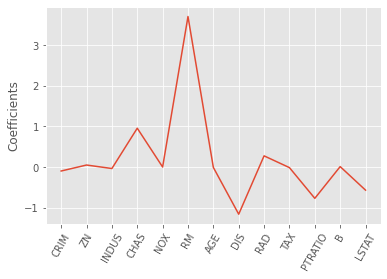

In [91]:
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel("Coefficients")
plt.show()

# Regularization I: Lasso

En el video, vio cómo Lasso seleccionó la función 'RM' como la más importante para predecir los precios de la vivienda en Boston, al tiempo que reducía los coeficientes de otras características a 0. Su capacidad para realizar la selección de características de esta manera se vuelve aún más útil cuando se trata de datos que involucran miles de funciones.

En este ejercicio, ajustará una regresión de lazo a los datos de Gapminder con los que ha estado trabajando y trazará los coeficientes. Al igual que con los datos de Boston, encontrará que los coeficientes de algunas características se reducen a 0, y solo quedan las más importantes.

In [92]:
X = df.drop(['life', 'Region'], axis=1)
y = df['life']

In [93]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

In [94]:
# Fit the regressor to the data
lasso.fit(X,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [95]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


In [96]:
df = df.drop(['life', 'Region'], axis=1)
len(df.columns)

8

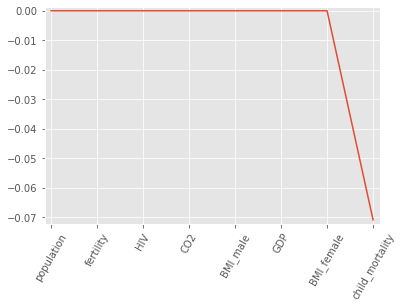

In [97]:
# Plot the coefficients
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

¡Buen trabajo! Según el algoritmo de lazo, parece que 'child_mortality' es la característica más importante a la hora de predecir la esperanza de vida.

# Regularization II: Ridge


Lasso es ideal para la selección de características, pero al crear modelos de regresión, la regresión de Ridge debería ser su primera opción.

Recuerde que lasso realiza la regularización agregando a la función de pérdida un término de penalización del valor absoluto de cada coeficiente multiplicado por algún alfa. Esto también se conoce como regularización L1 porque el término de regularización es la norma L1 de los coeficientes. Sin embargo, esta no es la única forma de regularizar.

Si, en cambio, tomara la suma de los valores al cuadrado de los coeficientes multiplicados por algún alfa, como en la regresión de Ridge, estaría calculando la norma L2. En este ejercicio, practicarás el ajuste de modelos de regresión de crestas en un rango de diferentes alfas y trazarás puntajes R2 validados cruzados para cada uno, utilizando esta función que hemos definido para ti, que representa el puntaje R2 así como el error estándar para cada uno. alfa:



In [98]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

No se preocupe por los detalles de la función anterior. La motivación detrás de este ejercicio es que vea cómo varía la puntuación R2 con diferentes alfas y que comprenda la importancia de seleccionar el valor correcto para alfa. Aprenderá a sintonizar alfa en el próximo capítulo

In [99]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [100]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)


In [101]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))


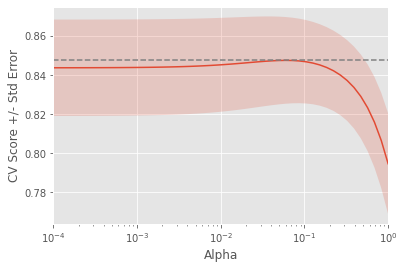

In [102]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

¡Buen trabajo! Observe cómo cambian las puntuaciones de validación cruzada con diferentes alfa. ¿Qué alfa deberías elegir? ¿Cómo puede afinar su modelo? ¡Aprenderá todo sobre esto en el próximo capítulo

-----
## **HOW GOOD IS YOUR MODEL?? FINE TUNING MODEL** (3)
-------


# Metrics for classification

En el Capítulo 1, evaluó el rendimiento de su clasificador k-NN según su precisión. Sin embargo, como comentó Andy, la precisión no siempre es una métrica informativa. En este ejercicio, profundizará en la evaluación del rendimiento de los clasificadores binarios calculando una matriz de confusión y generando un informe de clasificación.

Es posible que haya notado en el video que el informe de clasificación constaba de tres filas y una columna de soporte adicional. El apoyo da la cantidad de muestras de la respuesta verdadera que se encuentran en esa clase, por lo que en el ejemplo del video, el apoyo fue el número de republicanos o demócratas en el conjunto de prueba en el que se calculó el informe de clasificación. Las columnas de precisión, recuperación y puntuación f1, entonces, dieron las métricas respectivas para esa clase en particular.

Aquí, trabajará con el conjunto de datos de PIMA Indians obtenido del Repositorio de aprendizaje automático de UCI. El objetivo es predecir si una paciente determinada contraerá diabetes en función de características como el IMC, la edad y el número de embarazos. Por tanto, es un problema de clasificación binaria. Un valor objetivo de 0 indica que el paciente no tiene diabetes, mientras que un valor de 1 indica que el paciente tiene diabetes. Como en los Capítulos 1 y 2, el conjunto de datos se ha procesado previamente para tratar los valores faltantes.

El conjunto de datos se ha cargado en un DataFrame df y se han creado para usted las matrices de características y variables de destino X e y. Además, sklearn.model_selection.train_test_split y sklearn.neighbors.KNeighborsClassifier ya se han importado.

Su trabajo consiste en capacitar a un clasificador k-NN para los datos y evaluar su desempeño generando una matriz de confusión y un informe de clasificación.


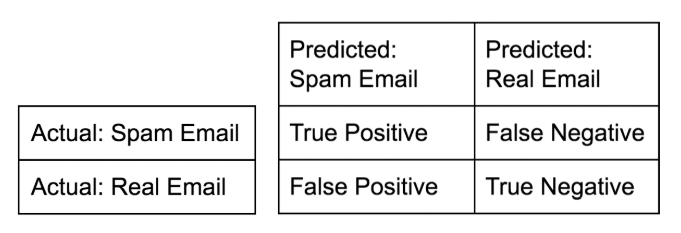

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [104]:
df = pd.read_csv('/content/PIMA_indias.txt', sep='\t')
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [105]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [107]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40,
random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.87      0.80       106
    positive       0.59      0.39      0.47        51

    accuracy                           0.71       157
   macro avg       0.67      0.63      0.64       157
weighted avg       0.70      0.71      0.70       157

[[92 14]
 [31 20]]


¡Excelente trabajo! Al analizar la matriz de confusión y el informe de clasificación, puede comprender mucho mejor el rendimiento de su clasificador.

# Building a logistic regression model

¡Es hora de construir su primer modelo de regresión logística! Como Hugo mostró en el video, scikit-learn hace que sea muy fácil probar diferentes modelos, ya que el paradigma Train-Test-Split / Instantiate / Fit / Predict se aplica a todos los clasificadores y regresores, que se conocen en scikit-learn como 'estimadores '. Verá esto ahora por sí mismo mientras entrena un modelo de regresión logística con exactamente los mismos datos que en el ejercicio anterior. ¿Superará a k-NN? ¡Solo hay una forma de averiguarlo!

Las matrices de características y variables de destino X e y se han precargado, y train_test_split se ha importado desde sklearn.model_selection.

In [108]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [110]:
X = df.drop('test', axis=1).values

In [111]:
y = df['test'].values


In [112]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [113]:
# Create the classifier: logreg
logreg = LogisticRegression()


In [114]:
# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[89 17]
 [22 29]]
              precision    recall  f1-score   support

    negative       0.80      0.84      0.82       106
    positive       0.63      0.57      0.60        51

    accuracy                           0.75       157
   macro avg       0.72      0.70      0.71       157
weighted avg       0.75      0.75      0.75       157




Ahora sabe cómo usar la regresión logística para la clasificación binaria: ¡excelente trabajo! La regresión logística se utiliza en una variedad de aplicaciones de aprendizaje automático y se convertirá en una parte vital de su caja de herramientas de ciencia de datos.

# Plotting an ROC curve

Los informes de clasificación y las matrices de confusión son excelentes métodos para evaluar cuantitativamente el rendimiento del modelo, mientras que las curvas ROC proporcionan una forma de evaluar visualmente los modelos. Como Hugo demostró en el video, la mayoría de los clasificadores en scikit-learn tienen un método .predict_proba () que devuelve la probabilidad de que una muestra dada esté en una clase particular. Habiendo construido un modelo de regresión logística, ahora evaluará su desempeño trazando una curva ROC. Al hacerlo, utilizará el método .predict_proba () y se familiarizará con su funcionalidad.

Aquí, continuará trabajando con el conjunto de datos de diabetes de PIMA Indians. El clasificador ya se ajustó a los datos de entrenamiento y está disponible como logreg.

In [116]:
y = df.test.replace({'negative':0, 'positive':1})

In [117]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [118]:
# Import necessary modules
from sklearn.metrics import roc_curve

In [119]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [120]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

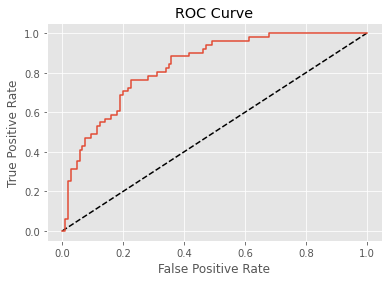

In [121]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Excellent! This ROC curve provides a nice visual way to assess your classifier's performance.

# Precision-recall Curve

Al observar su curva ROC, es posible que haya notado que el eje y (tasa positiva verdadera) también se conoce como recuperación. De hecho, además de la curva ROC, existen otras formas de evaluar visualmente el rendimiento del modelo. Una de estas formas es la curva de recuperación de precisión, que se genera trazando la precisión y recuperación para diferentes umbrales. Como recordatorio, la precisión y la recuperación se definen como:



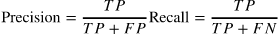

A la derecha, se generó una curva de recuperación de precisión para el conjunto de datos de diabetes. El informe de clasificación y la matriz de confusión se muestran en IPython Shell.

Estudie la curva de precisión-recuperación y luego considere las afirmaciones que se dan a continuación. Elija la única afirmación que no sea cierta. Tenga en cuenta que aquí, la clase es positiva (1) si el individuo tiene diabetes.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_prob)

0.8340732519422863

# AUC computation

Supongamos que tiene un clasificador binario que, de hecho, solo hace conjeturas al azar. Sería correcto aproximadamente el 50% de las veces, y la curva ROC resultante sería una línea diagonal en la que la tasa de verdaderos positivos y la tasa de falsos positivos son siempre iguales. El Área bajo esta curva ROC sería 0.5. Esta es una de las formas en que las AUC, que Hugo discutió en el video, es una métrica informativa para evaluar un modelo. Si el AUC es mayor que 0,5, el modelo es mejor que la adivinación aleatoria. ¡Siempre es una buena señal!

In [122]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [123]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]


In [124]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y, cv=5, scoring='roc_auc')

AUC: 0.8340732519422863


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [125]:
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC scores computed using 5-fold cross-validation: [0.75761974 0.81422351 0.83653846 0.81878698 0.8897929 ]


¡Buen trabajo! Ahora tiene varios métodos diferentes que puede utilizar para evaluar el rendimiento de su modelo.

# Hyperparameter tuning with GridSearchCV

Hugo demostró cómo ajustar el parámetro n_neighbors de KNeighborsClassifier () usando GridSearchCV en el conjunto de datos de votación. Ahora lo practicará usted mismo, ¡pero utilizando la regresión logística en el conjunto de datos de diabetes!

Al igual que el parámetro alfa de regularización de lazo y cresta que vio anteriormente, la regresión logística también tiene un parámetro de regularización: C. C controla la inversa de la intensidad de regularización, y esto es lo que sintonizará en este ejercicio. Una C grande puede dar lugar a un modelo de sobreajuste, mientras que una C pequeña puede llevar a un modelo de bajo ajuste.

El espacio de hiperparámetros para C se ha configurado para usted. Su trabajo es usar GridSearchCV y la regresión logística para encontrar el C óptimo en este espacio de hiperparámetros. La matriz de características está disponible como X y la matriz de variables de destino está disponible como y.

Quizás se pregunte por qué no se le pide que divida los datos en conjuntos de prueba y entrenamiento. ¡Buena observación! Aquí, queremos que se centre en el proceso de configurar la cuadrícula de hiperparámetros y realizar la validación cruzada de búsqueda de cuadrícula. En la práctica, querrá conservar una parte de sus datos para fines de evaluación, ¡y aprenderá todo sobre esto en el siguiente video!

In [126]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [127]:
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [128]:
X = df.drop('test', axis=1).values
y = df['test'].values

In [129]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [130]:
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()


In [131]:
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, r

In [132]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.8127659574468085



¡Buen trabajo! Parece que una 'C' de 3.727 da como resultado el mejor rendimiento.

# Hyperparameter tuning with RandomizedSearchCV

GridSearchCV puede ser computacionalmente costoso, especialmente si está buscando en un gran espacio de hiperparámetros y manejando múltiples hiperparámetros. Una solución a esto es usar RandomizedSearchCV, en el que no se prueban todos los valores de hiperparámetros. En cambio, se muestrea un número fijo de configuraciones de hiperparámetros a partir de distribuciones de probabilidad especificadas. Practicará el uso de RandomizedSearchCV en este ejercicio y verá cómo funciona.

Aquí, también se le presentará un nuevo modelo: el árbol de decisiones. No se preocupe por los detalles de cómo funciona este modelo. Al igual que k-NN, regresión lineal y regresión logística, los árboles de decisión en scikit-learn tienen métodos .fit () y .predict () que puede usar exactamente de la misma manera que antes. Los árboles de decisión tienen muchos parámetros que se pueden ajustar, como max_features, max_depth y min_samples_leaf: esto lo convierte en un caso de uso ideal para RandomizedSearchCV.

Como antes, la matriz de características X y la matriz de variables objetivo y del conjunto de datos de diabetes se han precargado. La configuración de hiperparámetros se ha especificado para usted. Su objetivo es utilizar RandomizedSearchCV para encontrar los hiperparámetros óptimos. ¡Ve a por ello!

In [133]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [134]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [135]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [136]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)


In [137]:
# Fit it to the data
tree_cv.fit(X_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 5}
Best score is 0.8


¡Buen trabajo! Verá muchos más árboles de decisiones y RandomizedSearchCV a medida que continúa su viaje de aprendizaje automático. Tenga en cuenta que RandomizedSearchCV nunca superará a GridSearchCV. En cambio, es valioso porque ahorra tiempo de cálculo.

# Hold-out set in practice I: Classification

Ahora practicarás la evaluación de un modelo con hiperparámetros ajustados en un conjunto de reserva. La matriz de características y la matriz de variables objetivo del conjunto de datos de diabetes se han precargado como X e y.

Además de C, la regresión logística tiene un hiperparámetro de 'penalización' que especifica si se usa la regularización 'l1' o 'l2'. Su trabajo en este ejercicio es crear un conjunto de retención, ajustar los hiperparámetros 'C' y 'penalización' de un clasificador de regresión logística utilizando GridSearchCV en el conjunto de entrenamiento.

In [138]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [139]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In [140]:
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()


In [141]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,
random_state=42)


In [142]:
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
 

In [143]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.006105402296585327, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.8127659574468085



¡Excelente trabajo! ¡Realmente estás dominando los fundamentos de la clasificación!

# Hold-out set in practice II: Regression


¿Recuerda la regresión de lazo y cresta del capítulo anterior? Lasso usó la penalización L1 para regularizar, mientras que ridge usó la penalización L2. Existe otro tipo de regresión regularizada conocida como red elástica. En la regularización neta elástica, el término de penalización es una combinación lineal de las penalizaciones L1 y L2:

a ∗ L1 + b ∗ L2
En scikit-learn, este término está representado por el parámetro 'l1_ratio': una 'l1_ratio' de 1 corresponde a una penalización L1, y cualquier valor inferior es una combinación de L1 y L2.

En este ejercicio, utilizará GridSearchCV para ajustar el 'l1_ratio' de un modelo de red elástica entrenado en los datos de Gapminder. Como en el ejercicio anterior, utilice un conjunto de reserva para evaluar el rendimiento de su modelo.

In [144]:
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [145]:
X = df.drop('test',axis=1)
y = df['test']

In [146]:
y = df.test.replace({'negative':0, 'positive':1})

In [147]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split

In [148]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,
random_state=42)

In [149]:
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

In [150]:
# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

In [151]:
# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

In [152]:
# Fit it to the training data

gm_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.77159227617374, tolerance: 0.004155319148936173
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.388878940016065, tolerance: 0.004155319148936173
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.49615923205447, tolerance: 0.0043404255319148925
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 1.0
Tuned ElasticNet MSE: 0.1676819998085433


¡Fantástico! Ahora que comprende cómo ajustar sus modelos, es hora de aprender sobre las técnicas de preprocesamiento y cómo unir todas las diferentes etapas del proceso de aprendizaje automático en una canalización.

------
## **PREPROCESSING DATA AND PIPELINES** (4)
-----


In [158]:
df_p.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [159]:
# Import pandas
import pandas as pd

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


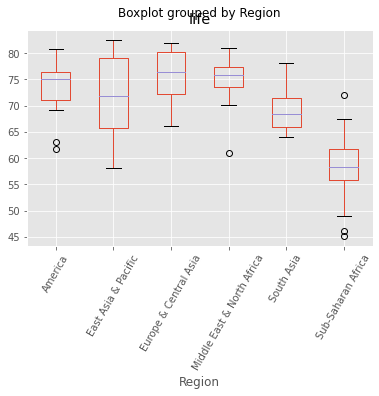

In [160]:
# Create a boxplot of life expectancy per region
df_p.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

# Creating dummy variables

Como Andy comentó en el video, scikit-learn no acepta características no numéricas. En el ejercicio anterior, vio que la función 'Región' contiene información muy útil que puede predecir la esperanza de vida. Por ejemplo, el África subsahariana tiene una esperanza de vida menor en comparación con Europa y Asia central. Por lo tanto, si está tratando de predecir la esperanza de vida, sería preferible conservar la función 'Región'. Para hacer esto, necesita binarizarlo creando variables ficticias, que es lo que hará en este ejercicio.

In [161]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df_p)

In [162]:
# Print the columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [163]:
# Create dummy variables with drop_first=True: df_region
df_region = df_region.drop('Region_America',axis=1)


In [164]:
# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [165]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


¡Excelente! Ahora que ha creado las variables ficticias, puede utilizar la función 'Región' para predecir la esperanza de vida.

# Regression with categorical features

Una vez que haya creado las variables ficticias a partir de la función 'Región', puede crear modelos de regresión como lo hizo antes. Aquí, usará la regresión de crestas para realizar una validación cruzada de 5 veces.

La matriz de características X y la matriz de variables de destino y se han precargado.

In [166]:
X = df_region.drop('life',axis=1)
y = df_region['life']

In [167]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [168]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

In [169]:
# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

In [170]:
# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


¡Excelente! Ahora sabe cómo crear modelos utilizando datos que incluyen características categóricas.

# Handling missing data
-----------

In [171]:
df = pd.read_csv('/content/PIMA_indias.txt', sep='\t')
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   392 non-null    int64  
 1   glucose    392 non-null    int64  
 2   diastolic  392 non-null    int64  
 3   triceps    392 non-null    int64  
 4   insulin    392 non-null    int64  
 5   bmi        392 non-null    float64
 6   family     392 non-null    float64
 7   age        392 non-null    int64  
 8   test       392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


In [173]:
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [174]:
df.insulin.unique()

array([ 94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115, 140,
       110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342, 304,
       142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,  76,
       220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,  50,
        92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285, 156,
        78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271, 129,
       120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375, 150,
        67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,  42,
       132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73, 108,
        43, 167, 249, 293,  66, 465, 158,  84,  72,  59,  81, 196, 415,
       275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95, 237, 191,
       328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65, 166, 274,
        77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15, 183,  91,
        46, 440, 159, 540, 200, 335, 387,  22, 291, 392, 178, 12

## DROPPING MISSING DATA

In [175]:
#df.insulin.replace(0,np.nan, inplace=True)
#df.triceps.replace(0,np.nan, inplace=True)
#df.bmi.replace(0,np.nan, inplace=True)

#df= df.dropna()


In [176]:
## IMPUTING MISSING DATA
from sklearn.impute import SimpleImputer

#SimpleImputer(missing_values='NaN', strategy='mean',axis=0)

# Dropping missing data


El conjunto de datos de votación del Capítulo 1 contenía un montón de valores faltantes que tratamos detrás de escena. ¡Ahora es el momento de que te encargues de esto tú mismo!

El conjunto de datos sin procesar se cargó en un DataFrame df. Explórelo en IPython Shell con el método .head (). Verá que hay ciertos puntos de datos etiquetados con un '?'. Estos denotan valores perdidos. Como vio en el video, diferentes conjuntos de datos codifican los valores faltantes de diferentes maneras. A veces puede ser un '9999', otras veces un 0: ¡los datos del mundo real pueden ser muy confusos! Si tiene suerte, los valores faltantes ya estarán codificados como NaN. Usamos NaN porque es una forma eficiente y simplificada de representar internamente los datos faltantes, y nos permite aprovechar los métodos pandas como .dropna () y .fillna (), así como el transformador de imputación Imputer () de scikit-learn.

En este ejercicio, su trabajo consiste en convertir los '?' En NaN y luego eliminar las filas que los contienen del DataFrame.
T


In [179]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [180]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64


In [181]:
# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

Shape of Original DataFrame: (435, 17)


In [182]:
# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

Shape of DataFrame After Dropping All Rows with Missing Values: (435, 17)


¡Buen trabajo! Cuando faltan muchos valores en su conjunto de datos, si los elimina, puede terminar desperdiciando información valiosa junto con los datos faltantes. En cambio, es mejor desarrollar una estrategia de imputación. Aquí es donde el conocimiento del dominio es útil, pero en ausencia de él, puede imputar los valores faltantes con la media o la mediana de la fila o columna en la que se encuentra el valor perdido.

# Imputing missing data in a ML Pipeline I

Como ha aprendido, hay muchos pasos para construir un modelo, desde crear conjuntos de entrenamiento y prueba, hasta ajustar un clasificador o regresor, ajustar sus parámetros y evaluar su rendimiento en nuevos datos. La imputación puede verse como el primer paso de este proceso de aprendizaje automático, la totalidad del cual puede verse dentro del contexto de una canalización. Scikit-learn proporciona un constructor de canalizaciones que le permite juntar estos pasos en un solo proceso y así simplificar su flujo de trabajo.

Ahora practicarás la configuración de una canalización con dos pasos: el paso de imputación, seguido de la instanciación de un clasificador. Hasta ahora, ha visto tres clasificadores en este curso: k-NN, regresión logística y el árbol de decisiones. Ahora se le presentará una cuarta: la máquina de vectores de soporte, o SVM. Por ahora, no se preocupe por cómo funciona bajo el capó. Funciona exactamente como cabría esperar de los estimadores scikit-learn con los que ha trabajado anteriormente, ya que tiene los mismos métodos .fit () y .predict () que antes.

In [183]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [184]:
SimpleImputer()

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [185]:
# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')

In [186]:
# Instantiate the SVC classifier: clf
clf = SVC()

In [187]:
# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

Fantastic! Having set up the pipeline steps, you can now use it for classification.

# Imputing missing data in a ML Pipeline II


Una vez que haya configurado los pasos de la canalización en el ejercicio anterior, ahora lo usará en el conjunto de datos de votación para clasificar la afiliación al partido de un congresista. Lo que hace que las canalizaciones sean tan increíblemente útiles es la interfaz simple que proporcionan. ¡Puede usar los métodos .fit () y .predict () en las canalizaciones tal como lo hizo con sus clasificadores y regresores!

Practique esto por sí mismo ahora y genere un informe de clasificación de sus predicciones. Los pasos de la canalización se han configurado para usted, y la matriz de características X y la matriz de variables de destino y se han precargado. Además, train_test_split y class_report se han importado de sklearn.model_selection y sklearn.metrics respectivamente.

In [188]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [189]:
X = df.drop('party', axis='columns')
y = df['party']

In [190]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [191]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='most_frequent')),
        ('SVM', SVC())]

In [192]:
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [193]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,
random_state=42)

In [194]:
# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

ValueError: ignored

In [195]:
# Compute metrics
print(classification_report(y_test, y_pred))

ValueError: ignored

Great work! Your pipeline has performed imputation as well as classification!

# Centering and scaling your data

En el video, Hugo demostró cuán significativamente puede mejorar el rendimiento de un modelo si se escalan las características. Tenga en cuenta que este no es siempre el caso: en el conjunto de datos de registros de votación del Congreso, por ejemplo, todas las funciones son binarias. En tal situación, la escala tendrá un impacto mínimo.

Ahora explorará la escala por sí mismo en un nuevo conjunto de datos: ¡Calidad del vino blanco! Hugo usó el conjunto de datos de la calidad del vino tinto en el video. Hemos utilizado la característica de 'calidad' del vino para crear una variable objetivo binaria: si 'calidad' es menor que 5, la variable objetivo es 1 y, de lo contrario, es 0.

El DataFrame se ha precargado como df, junto con las matrices de variables de función y destino X e y. Explórelo en IPython Shell. Observe cómo algunas características parecen tener diferentes unidades de medida. "densidad", por ejemplo, toma valores entre 0,98 y 1,04, mientras que "dióxido de azufre total" oscila entre 9 y 440. Como resultado, puede que valga la pena escalar las características aquí. Su trabajo en este ejercicio es escalar las entidades y calcular la desviación media y estándar de las entidades sin escala en comparación con las entidades escaladas.


In [ ]:
df = pd.read_csv('/content/wine_white.txt',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df.drop('quality',axis=1).values
y = df['quality'].values

In [ ]:
# Import scale
from sklearn.preprocessing import scale

In [ ]:
# Scale the features: X_scaled
X_scaled = scale(X)

In [ ]:
# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

Mean of Unscaled Features: 8.134219224515322
Standard Deviation of Unscaled Features: 16.726533979432848


In [ ]:
# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Scaled Features: 2.546626531486538e-15
Standard Deviation of Scaled Features: 1.0


Buen trabajo! Observe la diferencia en la desviación estándar y media de las entidades escaladas en comparación con las entidades sin escala.

# Centering and scaling in a pipeline

Con respecto a si el escalado es efectivo o no, ¡la prueba está en el pudín! Compruebe usted mismo si la ampliación de las características del conjunto de datos de calidad del vino blanco tiene algún impacto en su rendimiento. Utilizará un clasificador k-NN como parte de una canalización que incluye escalado y, a efectos de comparación, se ha proporcionado un clasificador k-NN entrenado en los datos sin escalar.

La matriz de características y la matriz de variables de destino se han precargado como X e y. Además, KNeighborsClassifier y train_test_split se han importado de sklearn.neighbors y sklearn.model_selection, respectivamente.

In [ ]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet

In [ ]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
random_state=42)

In [ ]:
# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)


# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)


In [ ]:
# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.5708333333333333
Accuracy without Scaling: 0.48541666666666666


¡Fantástico! ¡Parece que el escalado ha mejorado significativamente el rendimiento del modelo!

# Bringing it all together I: Pipeline for classification

¡Es el momento de juntar todo lo que ha aprendido hasta ahora en un proceso de clasificación! Su trabajo en este ejercicio es crear una canalización que incluya escalado y ajuste de hiperparámetros para clasificar la calidad del vino.

Volverá a utilizar el clasificador SVM al que se le presentó brevemente anteriormente en este capítulo. Los hiperparámetros que sintonizará son C y gamma. C controla la intensidad de la regularización. Es análogo a la C que sintonizó para la regresión logística en el Capítulo 3, mientras que gamma controla el coeficiente del kernel: no se preocupe por esto ahora, ya que está más allá del alcance de este curso.

Se han precargado los siguientes módulos y funciones: Pipeline, SVC, train_test_split, GridSearchCV, class_report, precision_score. Las matrices de características y variables de destino X e y también se han precargado.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

In [ ]:
# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
random_state=21)


In [ ]:
# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid =parameters,cv=3)

In [ ]:
# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.60625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.62      0.79      0.69       127
           6       0.57      0.63      0.60       131
           7       0.75      0.29      0.41        42
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.32      0.28      0.28       320
weighted avg       0.58      0.61      0.57       320

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bringing it all together II: Pipeline for regression

Para este ejercicio final, volverá al conjunto de datos de Gapminder. ¿Adivina qué? ¡Incluso este conjunto de datos tiene valores perdidos que tratamos en capítulos anteriores! ¡Ahora tienes todas las herramientas para cuidarlas tú mismo!

Su trabajo es crear una canalización que impute los datos faltantes, escale las funciones y ajuste una ElasticNet a los datos de Gapminder. Luego, ajustará la relación l1 de su ElasticNet usando GridSearchCV.

Se han importado todos los módulos necesarios y las matrices de variables de función y de destino se han precargado como X e y.

In [ ]:
df = pd.read_csv('/content/gm_2008_region.txt',sep='\t')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [ ]:
df.drop(['Region'], axis='columns', inplace=True)
X = df.drop('life', axis='columns').values
y = df['life'].values

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

In [ ]:
# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

In [ ]:
# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,
random_state=42)


In [ ]:
# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

In [ ]:
# Fit to the training set
gm_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896.5167846123913, tolerance: 0.558941590909091
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932.4892742484276, tolerance: 0.5893071666666668
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883.4834811281773, tolerance: 0.5890250303030303
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 936.624042

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputation',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   

In [ ]:
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217



¡Fantástico trabajo! ¡Ahora domina los fundamentos del aprendizaje supervisado con scikit-learn!